In [220]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.dates as md
import matplotlib.pyplot as plt
from matplotlib import gridspec
from datetime import datetime
import os
import seaborn as sns

In [76]:
# 환경설정
plt.style.use('default')
plt.rc('figure', figsize=(12, 6))
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')

array([3, 3, 2, 1, 3, 4, 2, 3, 4, 1, 4, 0, 4, 1, 1, 4, 1, 4, 0, 1, 0, 0,
       4, 0])

In [247]:
['DB'*12, 'HM'*12]

['DBDBDBDBDBDBDBDBDBDBDBDB', 'HMHMHMHMHMHMHMHMHMHMHMHM']

In [272]:
np.random.seed(1234)
# data = pd.DataFrame(data=np.column_stack((pd.period_range(start='2018-1-5', periods=100, freq='M'), np.random.normal(0, 1, size=100))), columns=['v1', 'v2'])
# data = pd.DataFrame(data=np.c_[['DB']*12 + ['HM']*12, np.random.normal(0, 1, size=24)], index=pd.date_range(start='2018-1-5', periods=24, freq='M'), columns=['comp', 'value'])
data = pd.DataFrame(data=np.c_[np.random.randint(0, 5, 24), np.random.normal(0, 1, size=24), np.random.normal(0, 1, size=24)], index=pd.date_range(start='2018-1-5', periods=24, freq='M'), columns=['comp', 'key', 'value'])
data = data.astype({'value': float})
# data = data.set_index('v1')
# data.sort_values('v1', ascending=False).loc[lambda df: df.v2 > 0]

In [160]:
# pd.period_range(start='2018-1-5', end='2018-12-31', freq='M')
# pd.date_range(start='2018-1-5', end='2018-8-1', freq='W-FRI')

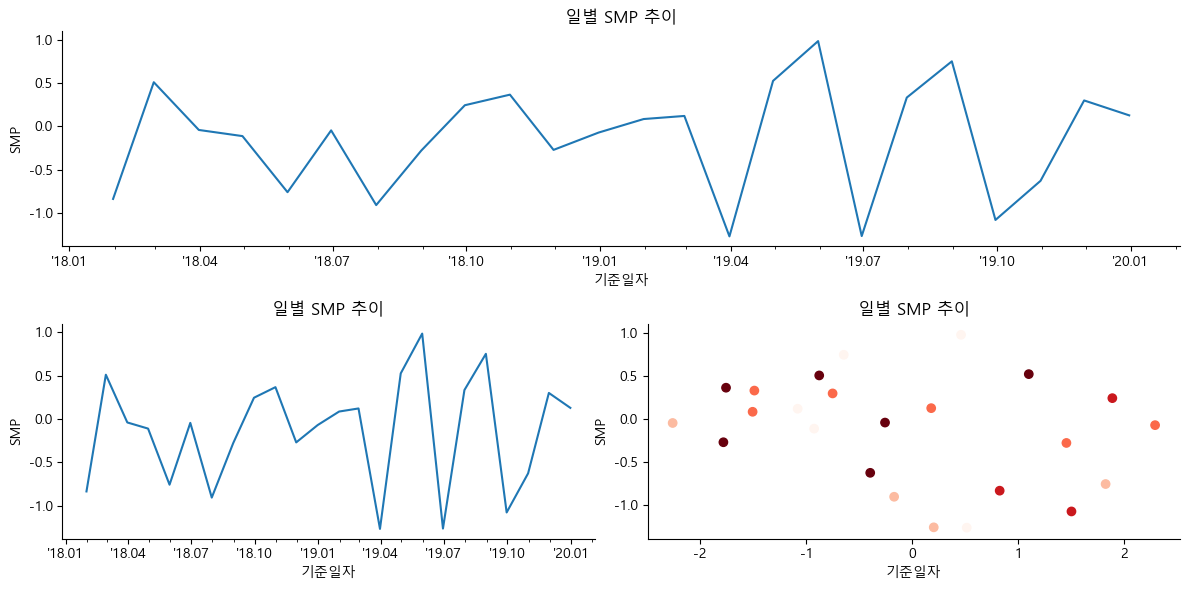

In [278]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 1)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 2, wspace=0.1, subplot_spec=gs[1])

ax0 = fig.add_subplot(gs0[0])
ax10 = fig.add_subplot(gs1[0])
ax11 = fig.add_subplot(gs1[1])

ax0.plot(data.value)
ax0.set(xlabel='기준일자', ylabel='SMP', title='일별 SMP 추이')
ax0.xaxis.set_minor_locator(md.MonthLocator())
ax0.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
# ax.xaxis.grid(True, which='major')

ax10.plot(data.value)
ax10.set(xlabel='기준일자', ylabel='SMP', title='일별 SMP 추이')
ax10.xaxis.set_minor_locator(md.MonthLocator())
ax10.xaxis.set_major_formatter(md.DateFormatter('\'%y.%m'))
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)

ax11.scatter(data.key, data.value, c=data.comp, cmap=plt.cm.Reds)
ax11.set(xlabel='기준일자', ylabel='SMP', title='일별 SMP 추이')
ax11.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()